## Importing Libraries

#### Data analysis Libraries

In [2]:
import pandas as pd
import numpy as np
import random as rnd

#### Visualization Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Machine Learning Libraries

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Upload Data

In [5]:
train_df = pd.read_csv("train (1).csv")
test_df  = pd.read_csv("test (1).csv")
combine = [train_df,test_df]

## Analyze Data

#### by Describing

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mack, Mrs. (Mary)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### by Visualization

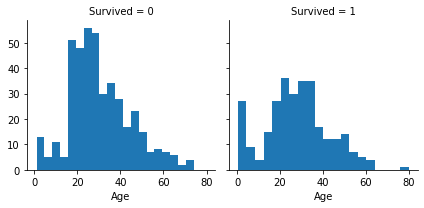

In [16]:
g = sns.FacetGrid(train_df,col = "Survived")
g.map(plt.hist,"Age",bins=20)

C:\Users\sam16\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


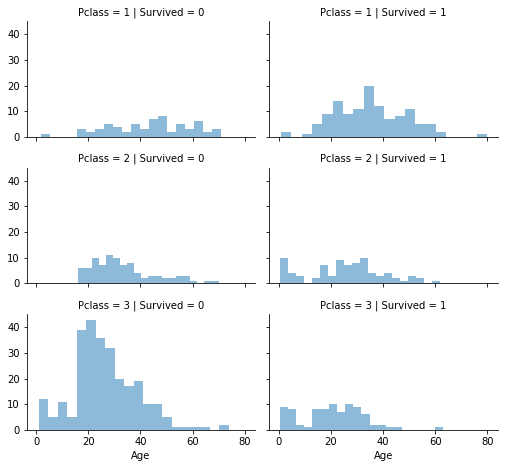

In [17]:
grid = sns.FacetGrid(train_df,col="Survived",row="Pclass",size = 2.2,aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend();


#### Correlating categorical features

C:\Users\sam16\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\sam16\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


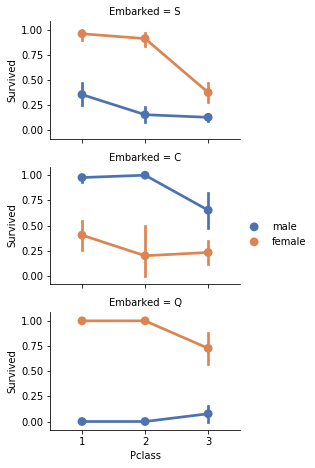

In [18]:
grid = sns.FacetGrid(train_df, row = "Embarked", size  = 2.2 , aspect=1.6)
grid.map(sns.pointplot,"Pclass","Survived","Sex",palette="deep")
grid.add_legend()

## Cleaning dataset

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_df = train_df.drop(["Ticket","Cabin","Name","PassengerId"],axis = 1)
test_df = test_df.drop(["Ticket","Cabin","Name"],axis = 1)


#### Conevrting categorical feature

In [21]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)

In [22]:
train_df["Sex"] = train_df["Sex"].map({"female":1,"male":0}).astype(int)

In [23]:
test_df["Sex"] = test_df["Sex"].map({"female": 1 , "male": 0}).astype(int)

In [24]:
print(train_df.head())
print(test_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    0  34.5      0      0   7.8292        Q
1          893       3    1  47.0      1      0   7.0000        S
2          894       2    0  62.0      0      0   9.6875        Q
3          895       3    0  27.0      0      0   8.6625        S
4          896       3    1  22.0      1      1  12.2875        S


#### Handle Null Value

In [25]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
train_df.tail(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
841,0,2,0,16.0,0,0,10.5000,S
842,1,1,1,30.0,0,0,31.0000,C
843,0,3,0,34.5,0,0,6.4375,C
844,0,3,0,17.0,0,0,8.6625,S
845,0,3,0,42.0,0,0,7.5500,S
846,0,3,0,NaN,8,2,69.5500,S
847,0,3,0,35.0,0,0,7.8958,C
848,0,2,0,28.0,0,1,33.0000,S
849,1,1,1,NaN,1,0,89.1042,C
850,0,3,0,4.0,4,2,31.2750,S


In [27]:
by_sex_class = train_df.groupby(["Sex","Pclass","Parch"])
def impute_mean(series):
    return series.fillna(series.mean())
train_df["Age"] = by_sex_class["Age"].transform(impute_mean)

In [28]:
train_df.tail(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
841,0,2,0,16.000000,0,0,10.5000,S
842,1,1,1,30.000000,0,0,31.0000,C
843,0,3,0,34.500000,0,0,6.4375,C
844,0,3,0,17.000000,0,0,8.6625,S
845,0,3,0,42.000000,0,0,7.5500,S
846,0,3,0,10.884615,8,2,69.5500,S
847,0,3,0,35.000000,0,0,7.8958,C
848,0,2,0,28.000000,0,1,33.0000,S
849,1,1,1,36.285714,1,0,89.1042,C
850,0,3,0,4.000000,4,2,31.2750,S


In [29]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [30]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [31]:
by_sex_class = test_df.groupby(["Sex","Pclass"])
def impute_mean(series):
    return series.fillna(series.mean())
test_df["Age"] = by_sex_class["Age"].transform(impute_mean)

In [32]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [33]:
train_df["Age"] = train_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)


In [34]:
#for Combine dataset
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

    
#for train dataset

train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[(train_df['Age'] > 64) , 'Age']

#for test dataset

test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[(test_df['Age'] > 64) , 'Age']



81    67
96    76
Name: Age, dtype: int32

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


In [36]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,7.8292,Q
1,893,3,1,2,1,0,7.0000,S
2,894,2,0,3,0,0,9.6875,Q
3,895,3,0,1,0,0,8.6625,S
4,896,3,1,1,1,1,12.2875,S


## Create New Feature Combining Existing Features

In [37]:
train_df["Familysize"] = train_df["SibSp"]+train_df["Parch"] + 1
test_df["Familysize"] = test_df["SibSp"]+test_df["Parch"] + 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
0,0,3,0,1,1,0,7.2500,S,2
1,1,1,1,2,1,0,71.2833,C,2
2,1,3,1,1,0,0,7.9250,S,1
3,1,1,1,2,1,0,53.1000,S,2
4,0,3,0,2,0,0,8.0500,S,1


In [38]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Familysize     0
dtype: int64

In [39]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Familysize    0
dtype: int64

In [40]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
886,0,2,0,1,0,0,13.00,S,1
887,1,1,1,1,0,0,30.00,S,1
888,0,3,1,0,1,2,23.45,S,4
889,1,1,0,1,0,0,30.00,C,1
890,0,3,0,1,0,0,7.75,Q,1


In [41]:
train_df['IsAlone'] = 0
train_df.loc[train_df['Familysize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['Familysize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [42]:
train_df = train_df.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,S,0
1,1,1,1,2,71.2833,C,0
2,1,3,1,1,7.9250,S,1
3,1,1,1,2,53.1000,S,0
4,0,3,0,2,8.0500,S,1


In [43]:
freq  =train_df.Embarked.dropna().mode()[0]
freq

'S'

In [44]:
train_df.Embarked = train_df.Embarked.fillna(freq)
test_df.Embarked = test_df.Embarked.fillna(freq)

train_df[["Embarked","Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [45]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
IsAlone     0
dtype: int64

In [46]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
IsAlone        0
dtype: int64

In [47]:
train_df.Embarked.isnull().sum()

0

In [48]:
test_df.Embarked.isnull().sum()

0

In [49]:
test_df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [50]:

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,7.2500,0,0
1,1,1,1,2,71.2833,1,0
2,1,3,1,1,7.9250,0,1
3,1,1,1,2,53.1000,0,0
4,0,3,0,2,8.0500,0,1


In [51]:
test_df['Fare'].fillna(test_df["Fare"].dropna().median() , inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,7.8292,2,1
1,893,3,1,2,7.0000,0,0
2,894,2,0,3,9.6875,2,1
3,895,3,0,1,8.6625,0,1
4,896,3,1,1,12.2875,0,0


In [52]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [53]:
#training dataset
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

#testing dataset
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3
test_df['Fare'] = test_df['Fare'].astype(int)

In [54]:
train_df = train_df.drop(["FareBand"],axis=1)
print(train_df.head())
print(test_df.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0         0       3    0    1     0         0        0
1         1       1    1    2     3         1        0
2         1       3    1    1     1         0        1
3         1       1    1    2     3         0        0
4         0       3    0    2     1         0        1
   PassengerId  Pclass  Sex  Age  Fare  Embarked  IsAlone
0          892       3    0    2     0         2        1
1          893       3    1    2     0         0        0
2          894       2    0    3     1         2        1
3          895       3    0    1     1         0        1
4          896       3    1    1     1         0        0


##  MODEL , PREDICT & SOLVE

In [55]:
xtrain = train_df.drop("Survived",axis =1)
ytrain = train_df.Survived
xtest = test_df.drop("PassengerId",axis=1).copy()
xtrain.shape,ytrain.shape,xtest.shape

((891, 6), (891,), (418, 6))

 #### Logistic Regression

In [69]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
rslt1 = round(logreg.score(xtrain,ytrain)*100,2)
rslt1

C:\Users\sam16\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.56

In [57]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.458074
4,Embarked,0.320137
3,Fare,0.031333
2,Age,-0.029041
5,IsAlone,-0.077610
0,Pclass,-0.948611


#### Support Vector Machines

In [58]:
svc = SVC()
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
rslt = round(svc.score(xtrain,ytrain)*100,2)
rslt

C:\Users\sam16\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.15

#### K Nearest Neighbour Classifier

In [59]:
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain , ytrain)
ypred  = knn.predict(xtest)
acc_knn = round(knn.score(xtrain,ytrain)*100 , 2)
acc_knn

83.05

#### Gausian Naive Bayes

In [61]:
gau = GaussianNB()
gau.fit(xtrain,ytrain)
ypred = gau.predict(xtest)
acc_gau = round(gau.score(xtrain,ytrain)*100,2)
acc_gau

75.31

#### Perceptron

In [63]:
per = Perceptron()
per.fit(xtrain,ytrain)
ypred = per.predict(xtest)
acc_per = round(per.score(xtrain,ytrain)*100,2)
acc_per

76.99

#### Linear SVC

In [64]:
linear_svc = LinearSVC()
linear_svc.fit(xtrain, ytrain)
ypred = linear_svc.predict(xtest)
acc_linear_svc = round(linear_svc.score(xtrain, ytrain) * 100, 2)
acc_linear_svc

C:\Users\sam16\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.56

#### Stochastic Gradient Descent

In [65]:
sgd  = SGDClassifier()
sgd.fit(xtrain,ytrain)
ypred = sgd.predict(xtest)
acc_sgd = round(sgd.score(xtrain, ytrain) * 100, 2)
acc_sgd

62.29

####  Decision Tree

In [66]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
acc_dt = round(dt.score(xtrain, ytrain) * 100, 2)
acc_dt

85.97

#### Random Forest

In [67]:
RF  = RandomForestClassifier(n_estimators=100)
RF.fit(xtrain, ytrain)
Y_pred = RF.predict(xtest)
RF.score(xtrain, ytrain)
acc_RF = round(RF.score(xtrain, ytrain) * 100, 2)
acc_RF

85.97

## MODEL EVALUTION

In [70]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [rslt, acc_knn, rslt1, 
              acc_RF, acc_gau, acc_per, 
              acc_sgd, acc_linear_svc, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.97
8,Decision Tree,85.97
1,KNN,83.05
0,Support Vector Machines,78.56
2,Logistic Regression,78.56
7,Linear SVC,78.56
5,Perceptron,76.99
4,Naive Bayes,75.31
6,Stochastic Gradient Decent,62.29


In [71]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": ypred
    })

In [72]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [74]:
submission.to_csv("Submission.csv",index = False)